In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, make_scorer
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.font_manager as font_manager
from matplotlib.font_manager import FontProperties


%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Read excel file
df = pd.read_excel('Database 0404.xlsx', header=1)

# The feature names are in the second row (already done in the previous step)


# Set the target column
target = 'Product titer (g/L)'

# Count the semicolons in 'genes_modified_updated'
df['Genes modified'] = df['Genes modified'].fillna('').apply(lambda x: x.count(';'))

# Count the ones in 'gene_overexpression' and 'heterologous_gene'
df['Genes overexpressed'] = df['Genes overexpressed'].fillna('').apply(lambda x: str(x).count('1'))
df['Heterologous genes'] = df['Heterologous genes'].fillna('').apply(lambda x: str(x).count('1'))
df['Genes deleted'] = df['Genes deleted'].fillna('').apply(lambda x: str(x).count('1'))

# Remove 'dataID' and 'paper_number' columns
df = df.drop(['dataID', 'paper_number','product_name'], axis=1)

# Impute all NaN data as zero
imputer = SimpleImputer(strategy='constant', fill_value=0)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Stratified data split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=66666)
X = df_imputed.drop(target, axis=1)
y = df_imputed[target]
product_class = df_imputed['Product class']

for train_index, test_index in split.split(X, product_class):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


C:\Users\shawn\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


R2 Score: 0.8589
RMSE: 7.82


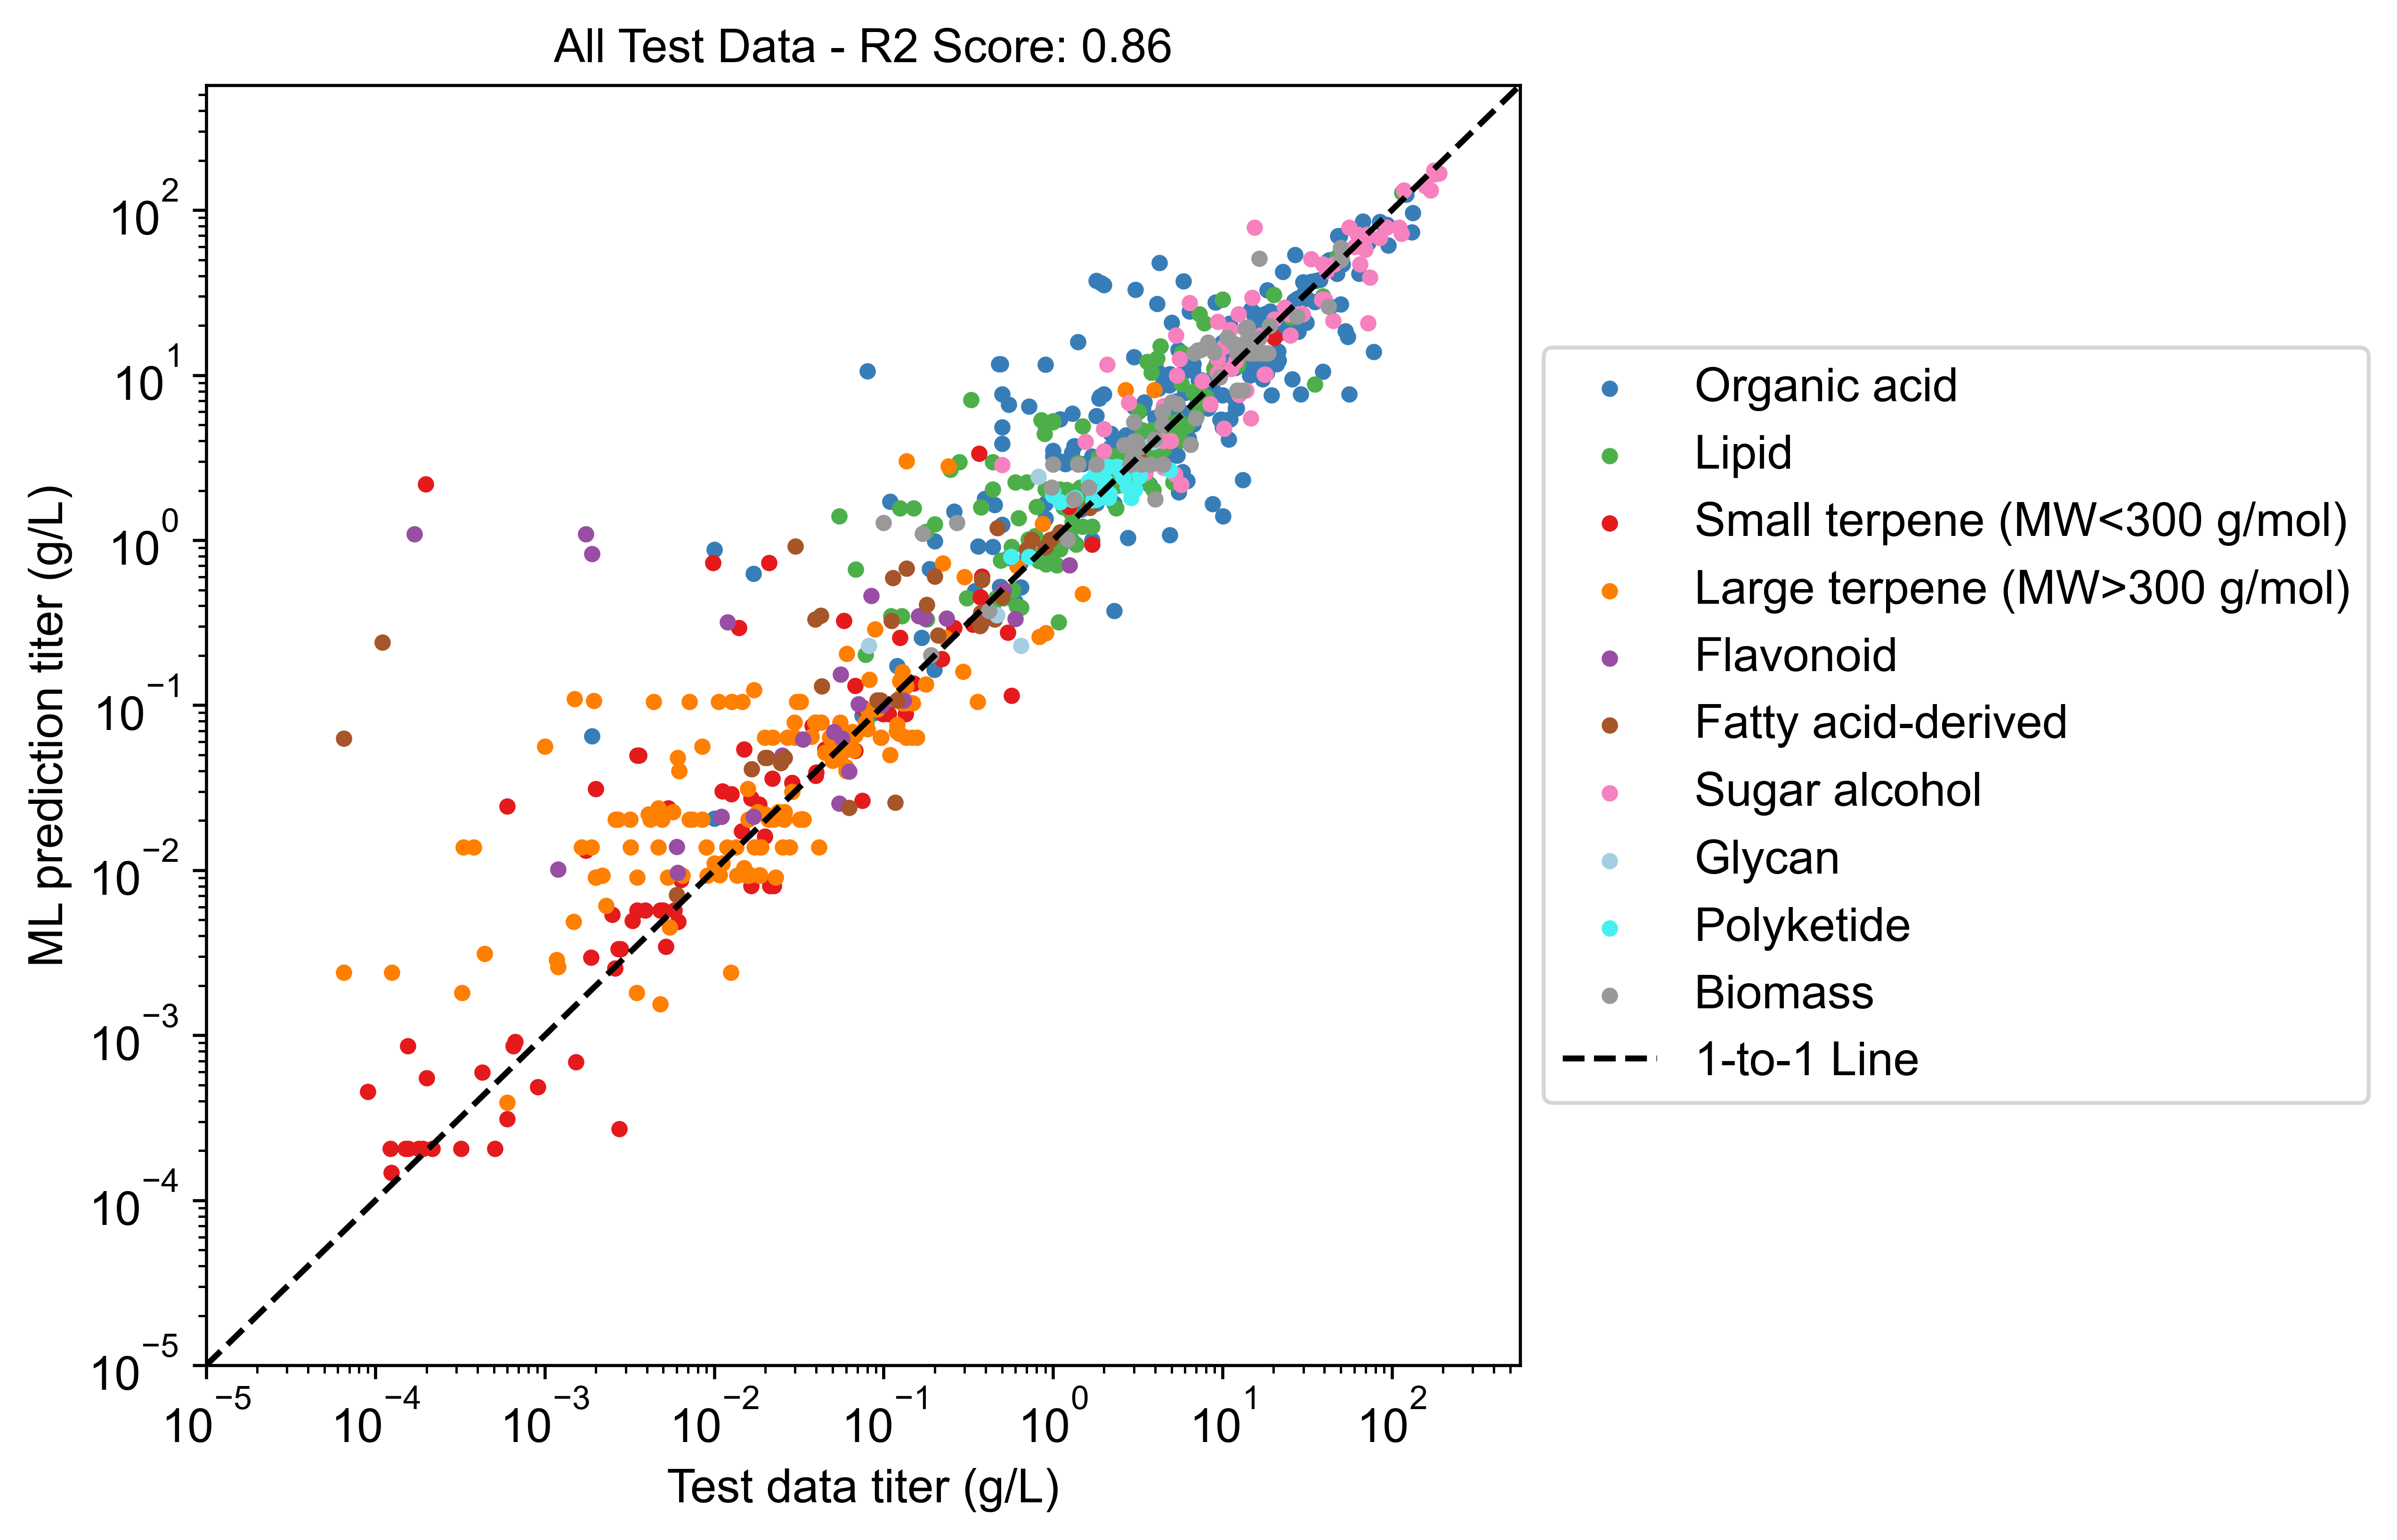

In [2]:
# Define RMSE function
def rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return np.sqrt(mse)

# Create custom RMSE scorer
rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Write a random forest regressor
rf = RandomForestRegressor(random_state=42, criterion='mse')  # 'mse' is the default criterion
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate R2 score and average error percentage
r2 = r2_score(y_test, y_pred)
rmse_value = rmse(y_test, y_pred)

# Print R2 and RMSE
print(f"R2 Score: {r2:.4f}")
print(f"RMSE: {rmse_value:.2f}")


class_names = {
    1: "Organic acid",
    2: "Lipid",
    3: "Small terpene (MW<300 g/mol)",
    4: "Large terpene (MW>300 g/mol)",
    5: "Flavonoid",
    6: "Fatty acid-derived",
    7: "Sugar alcohol",
    8: "Glycan",
    9: "Polyketide",
    10: "Biomass",
}

palette = [
    '#377eb8', # Blue
    '#4daf4a', # Green
    '#e41a1c', # Red
    '#ff7f00', # Orange
    '#984ea3', # Purple
    '#a65628', # Brown
    '#f781bf', # Pink
    '#a6cee3', # Light Blue
    '#46f0f0', # Cyan
    '#999999'  # Gray
]


# Create a scatter plot for all test data
fig, ax = plt.subplots(figsize=(6, 6),dpi=300)

for idx, (product_class, class_name) in enumerate(class_names.items()):
    # Filter test data and predictions for the current product class
    mask = X_test['Product class'] == product_class
    filtered_test_data = y_test[mask]
    filtered_predictions = y_pred[mask]

    # Plot the data points for the current product class
    ax.scatter(filtered_test_data, filtered_predictions, color=palette[idx], label=f"{class_name}", s=10)

    
font_size = 12
font_prop = FontProperties(family='Arial', size=font_size)

ax.set_xlabel('Test data titer (g/L)', fontproperties=font_prop)
ax.set_ylabel('ML prediction titer (g/L)', fontproperties=font_prop)
ax.set_title(f"All Test Data - R2 Score: {r2:.2f}", fontproperties=font_prop)
ax.set_xscale('log')
ax.set_yscale('log')

# Set the font properties for x-axis and y-axis tick labels
ax.tick_params(axis='both', which='major', labelsize=font_size)
for label in ax.get_xticklabels():
    label.set_fontproperties(font_prop)
for label in ax.get_yticklabels():
    label.set_fontproperties(font_prop)


# Add a 1-to-1 line
max_value = max(y_test.max(), y_pred.max())*3
ax.plot([0, max_value], [0, max_value], color='black', linestyle='--', label='1-to-1 Line')

ax.set_xlim(1e-5, max_value)
ax.set_ylim(1e-5, max_value)

# Move the legend outside the plot
font = font_manager.FontProperties(family='Arial', size=12)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop=font)

plt.show()

In [3]:
# 9. Create a scatter plot for each product class
classes = np.sort(df_imputed['Product class'].unique())

# Calculate the number of rows based on the number of classes and columns
num_columns = 2
num_rows = int(np.ceil(len(classes) / num_columns))



subplot_size = 5

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(subplot_size * num_columns, subplot_size * num_rows),dpi=300)

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

font_size = 12
font_prop = FontProperties(family='Arial', size=font_size)

for idx, product_class in enumerate(classes):
    # Filter test data and predictions for the current product class
    mask = X_test['Product class'] == product_class
    filtered_test_data = y_test[mask]
    filtered_predictions = y_pred[mask]

    # Calculate R2 score and RMSE for the current product class
    r2_class = r2_score(filtered_test_data, filtered_predictions)
    mse_class = mean_squared_error(filtered_test_data, filtered_predictions)
    rmse_class = np.sqrt(mse_class)

    # Get the current subplot axis
    ax = axes[idx // num_columns, idx % num_columns]

    # Create a scatter plot
    ax.scatter(filtered_test_data, filtered_predictions, color=palette[idx], s=15)
    ax.set_xlabel('Test data titer (g/L)', fontproperties=font_prop)
    ax.set_ylabel('ML prediction titer (g/L)', fontproperties=font_prop)
    ax.set_title(f"Product Class {int(product_class)}: {class_names[int(product_class)]}", fontproperties=font_prop)
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    # Set the font properties for x-axis and y-axis tick labels
    ax.tick_params(axis='both', which='major', labelsize=font_size)
    for label in ax.get_xticklabels():
        label.set_fontproperties(font_prop)
    for label in ax.get_yticklabels():
        label.set_fontproperties(font_prop)
    
    # Set the same limits for the x-axis and y-axis
    min_nonzero_value = min(np.min(filtered_test_data[filtered_test_data > 0]), np.min(filtered_predictions[filtered_predictions > 0]))
    max_value = max(filtered_test_data.max(), filtered_predictions.max())*3
    ax.set_xlim(min_nonzero_value, max_value)
    ax.set_ylim(min_nonzero_value, max_value)

    # Add a 1-to-1 line
    ax.plot([min_nonzero_value, max_value], [min_nonzero_value, max_value], color='black', linestyle='--')
    
    # Add R2 and RMSE text
    text_position = (0.05, 0.95)
    ax.text(text_position[0], text_position[1], f'R2: {r2_class:.2f}\nRMSE: {rmse_class:.2f}',
            fontproperties=font_prop, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black', alpha=0.7))

for i in range(idx + 1, num_rows * num_columns):
    axes[i // num_columns, i % num_columns].set_visible(False)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.show()
